# Q learning on a OpenAI gym (Introduction)
[Tutorial 1](https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0#.)

In [4]:
import gym
import numpy as np

env = gym.make('FrozenLake-v0')

[2016-12-07 14:02:06,061] Making new env: FrozenLake-v0


In [40]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

lr = 0.85
y = 0.99

num_episodes = 2000

r_list = []
for i in range(num_episodes):
    s = env.reset()
    rAll = 0
    j = 0
    d = False
    while j < 99:
        j += 1
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        s1,r,d,_ = env.step(a)
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    r_list.append(rAll)

In [41]:
print "Score over time: " + str(sum(r_list)/num_episodes)
print "Final Q table values: "
print Q

Score over time: 0.4795
Final Q table values: 
[[  5.70606822e-01   1.28067492e-02   6.88811293e-03   1.42063843e-02]
 [  3.04974697e-03   1.02859565e-03   1.22140980e-03   4.92294395e-01]
 [  1.81487999e-03   2.47828349e-03   5.71376305e-04   4.06872678e-01]
 [  1.42862280e-03   1.30614665e-03   3.07130221e-05   4.01659830e-01]
 [  7.26990572e-01   3.03664551e-04   1.05815234e-04   1.79187543e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.92679483e-01   1.19058067e-06   5.85849276e-05   1.67945506e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  9.56654132e-05   1.11359822e-04   8.74185552e-04   7.21764727e-01]
 [  3.69056980e-03   6.90538884e-01   6.31108500e-04   1.01940242e-03]
 [  7.45197320e-01   2.48145943e-04   3.69886166e-05   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  9.44108120e-05   4.6139443

### Using TensorFlow

In [37]:

import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [45]:
env = gym.make('FrozenLake-v0')

tf.reset_default_graph()

input1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(input1,W)
predict = tf.argmax(Qout,1)

nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = train.minimize(loss)

[2016-12-07 16:23:54,061] Making new env: FrozenLake-v0


In [50]:
num_episodes = 2000
y = 0.99
e = 0.1
jList = []
rList = []
init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        s = env.reset()
        rAll = 0
        j = 0
        d = False
        while j < 99:
            j += 1
            a,allQ = sess.run([predict,Qout],feed_dict={input1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            s1,r,d,_ = env.step(a[0])
            Q1 = sess.run(Qout,feed_dict={input1:np.identity(16)[s1:s1+1]})
            
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            
            _,W1 = sess.run([updateModel,W],feed_dict={input1:np.identity(16)[s:s+1],nextQ:targetQ})
            
            rAll += r
            s = s1
            if d == True:
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print "Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%"
            

Percent of succesful episodes: 0.3545%


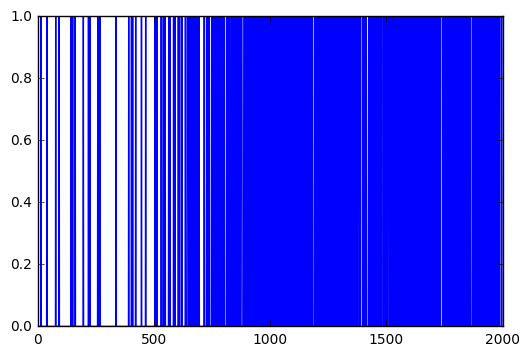

In [52]:
plt.plot(rList)

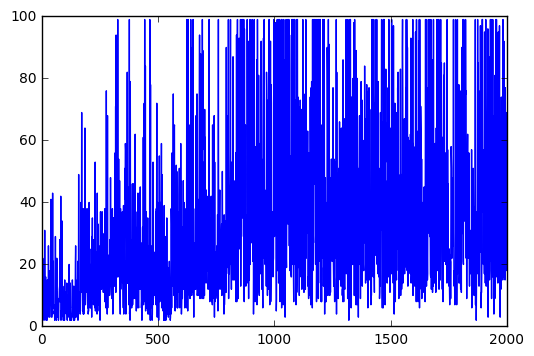

In [53]:
plt.plot(jList)